# %% [markdown]
# ## 📘 Project Title: Exploratory Data Analysis on Forbes Global 2000 Companies
# 
# ### 🎯 Objective
# The goal of this exercise is to perform **Exploratory Data Analysis (EDA)** on the Forbes 2000 dataset to:
# - Understand the structure and distribution of global companies.
# - Derive statistical insights on **market value**, **profit**, and **sector composition**.
# - Visualize patterns and outliers using **box plots** and **pie charts**.
# - Practice core **descriptive statistics** and **data visualization** techniques used in machine learning pipelines.
# 
# ### 📚 Key Concepts Covered
# | Topic                      | Description |
# |---------------------------|-------------|
# | **Data Cleaning**         | Handling missing values using `dropna()` to prepare for analysis. |
# | **Descriptive Statistics**| Measures of central tendency (mean, median, mode) and dispersion (range, IQR). |
# | **Data Aggregation**      | Grouping data using `groupby()` to summarize companies by sector. |
# | **Visualization**         | Plotting box plots and pie charts with Seaborn and Matplotlib to interpret distributions and proportions. |
# | **Outlier Detection**     | Using **IQR** and box plots to identify potential outliers in profits and market value. |
# | **Categorical Distribution** | Using pie charts to understand category-wise spread of companies across sectors. |
# 
# ### 🧠 Why Is This Important in Machine Learning?
# - **EDA is a foundational step** in any machine learning workflow. It helps you:
#   - Understand variable distributions and relationships.
#   - Detect data quality issues like missing values and outliers.
#   - Choose the right features and preprocessing techniques for modeling.
# - Practicing with real-world datasets like Forbes helps **build data intuition**, a key skill for any AI/ML practitioner.

# %%
# Import required libraries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Company       2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         2000 non-null   float64
 4   Profits       2000 non-null   float64
 5   Assets        2000 non-null   float64
 6   Market Value  2000 non-null   float64
 7   Sector        1803 non-null   object 
 8   Industry      1509 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 140.8+ KB


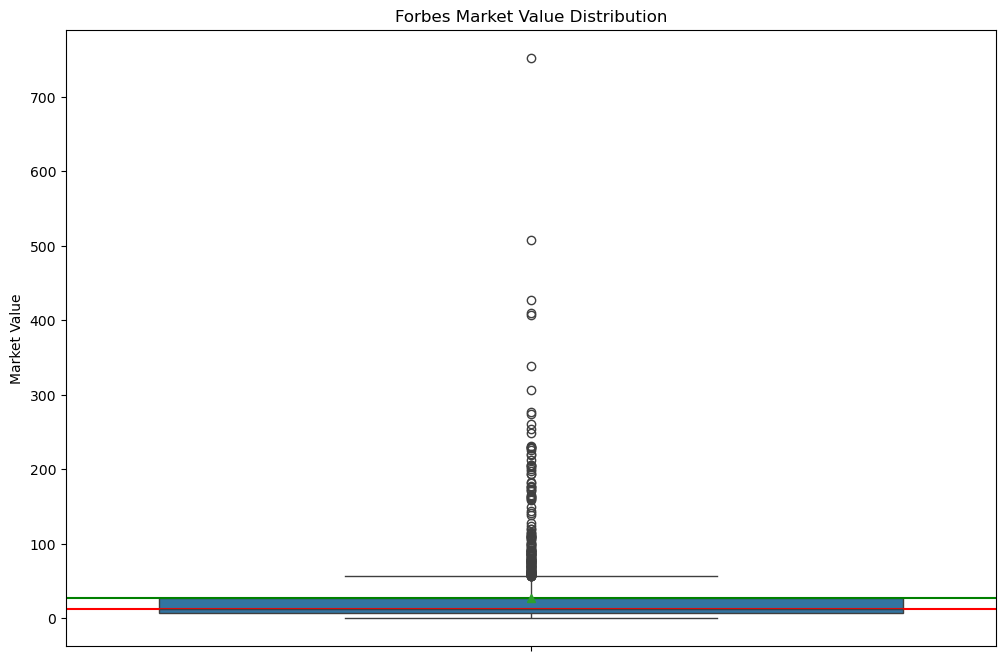

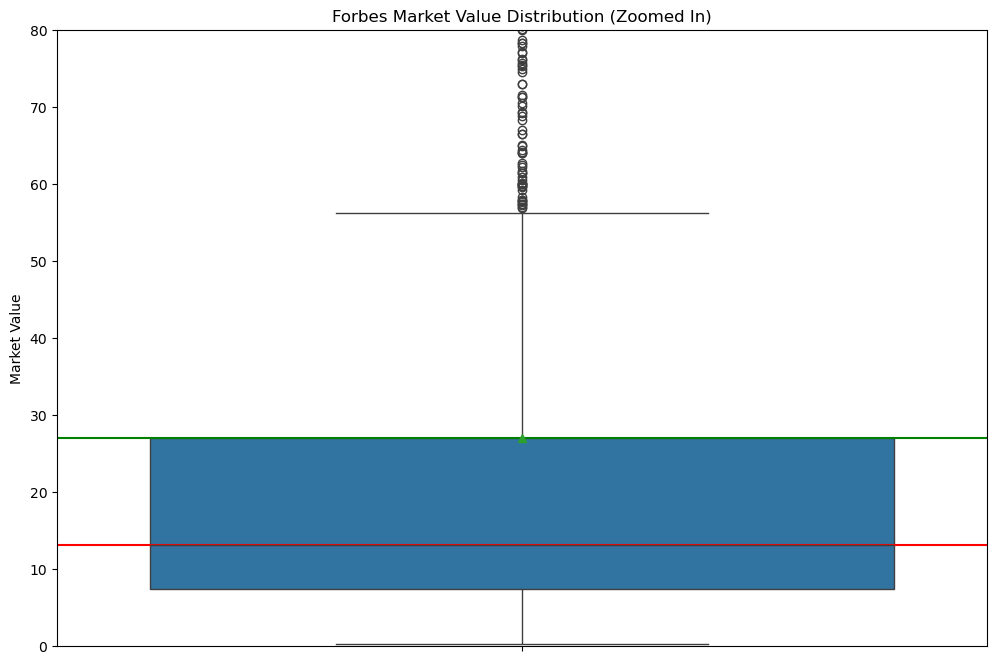

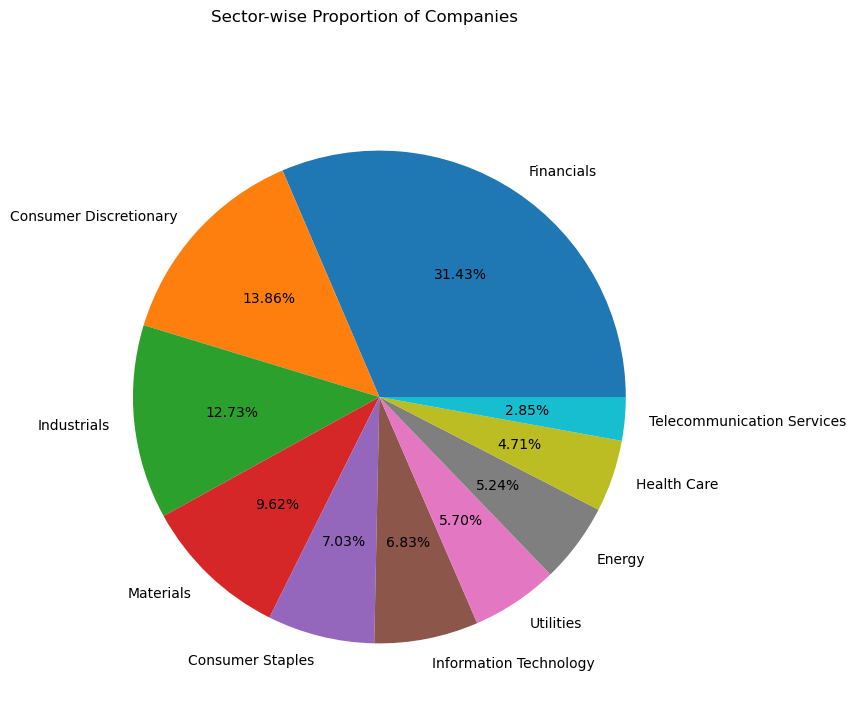

np.float64(1.0752499999999998)

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Forbes dataset
forbes = pd.read_csv('datasets/forbes.csv')

# Preview the dataset
forbes.head()  # Shows the first 5 rows

# Check for missing values in each column
forbes.isnull().sum()
# 'Sector' and 'Industry' have missing values.

# Show data info: column types, non-null counts, memory usage
forbes.info()

# Drop rows with any missing values to ensure clean analysis
forbes.dropna(inplace=True)

# Confirm there are no missing values
forbes.isnull().sum()

# Check the new shape after removing nulls
forbes.shape  # (1508, 9)

# ---------------------------------------------
# Summary Statistics for 'Market Value' column
# ---------------------------------------------

# Mean of Market Value
market_value_mean = forbes['Market Value'].mean()
market_value_mean

# Median of Market Value
market_value_median = forbes['Market Value'].median()
market_value_median

# Minimum and Maximum of Market Value
forbes['Market Value'].min()
forbes['Market Value'].max()

# ---------------------------------------------
# Frequency distribution of companies by Sector
# ---------------------------------------------

forbes['Sector'].value_counts()  # Shows count of companies in each sector

# Most common sector
forbes['Sector'].mode()  # Output: Financials

# ---------------------------------------------
# Descriptive Statistics of Numerical Columns
# ---------------------------------------------

forbes.describe()
# Includes count, mean, std, min, 25%, 50%, 75%, max for all numeric columns

# ---------------------------------------------
# Box Plot of Market Value
# ---------------------------------------------

plt.figure(figsize=(12, 8))
sns.boxplot(data=forbes, y='Market Value', showmeans=True)

# Overlay mean and median lines
plt.axhline(y=market_value_mean, color='g', linestyle='-')   # Green = mean
plt.axhline(y=market_value_median, color='r', linestyle='-') # Red = median

plt.title('Forbes Market Value Distribution')
plt.show()

# Zoomed version to avoid distortion from outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=forbes, y='Market Value', showmeans=True)
plt.ylim(0, 80)
plt.axhline(y=market_value_mean, color='g', linestyle='-')
plt.axhline(y=market_value_median, color='r', linestyle='-')
plt.title('Forbes Market Value Distribution (Zoomed In)')
plt.show()

# ---------------------------------------------
# Sector-wise count of companies
# ---------------------------------------------

gb = forbes.groupby('Sector', as_index=False).count()
gb = gb[['Sector', 'Rank']]  # We just need one column to count
gb = gb.sort_values(by='Rank', ascending=False)  # Sort by count

# ---------------------------------------------
# Pie Chart for Sector Distribution
# ---------------------------------------------

plt.figure(figsize=(12, 8))
plt.pie(gb['Rank'], labels=gb['Sector'], autopct='%.2f%%')
plt.suptitle('Sector-wise Proportion of Companies')
plt.show()

# ---------------------------------------------
# Dispersion Measures for Profits
# ---------------------------------------------

# Range: max - min
profits_max = forbes['Profits'].max()
profits_min = forbes['Profits'].min()
profit_range = profits_max - profits_min
profit_range  # 58.2

# Interquartile Range (IQR)
Q1 = np.quantile(forbes["Profits"], 0.25)
Q3 = np.quantile(forbes["Profits"], 0.75)
IQR = Q3 - Q1
IQR  # ~1.08
